In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect = True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x274b53b5e88>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

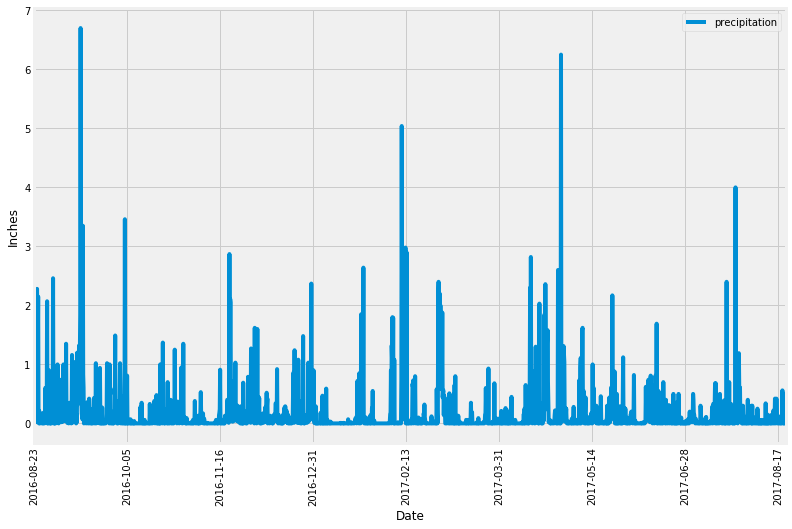

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first()
last_date = last_date[0]
date_12month_before = dt.datetime.strptime(last_date,"%Y-%m-%d") - dt.timedelta(days=365)
d =date_12month_before.date()
one_year_before_date=d.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
last_12_month_prcp = session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date >= one_year_before_date).filter(Measurement.date <= last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12_month_prcp[:],columns = ['precipitation','Date'])
df.set_index('Date', inplace=True, )

# Sort the dataframe by date
df_sorted = df.sort_values('Date')

#dropped the NaN values
df_sorted = df_sorted.dropna()
df_sorted
# Use Pandas Plotting with Matplotlib to plot the data
plot = df_sorted.plot(figsize = (12,8),rot =90)

plot.set_ylabel('Inches')

plot.figure.savefig('output/precipitation.png')


In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
# Design a query to show how many stations are available in this dataset?
number_of_station= session.query(Measurement).group_by(Measurement.station).count()
number_of_station

9

In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_station = active_stations[0][0]
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).filter_by(station = most_active_station).all()


[(54.0, 85.0, 71.66378066378067)]

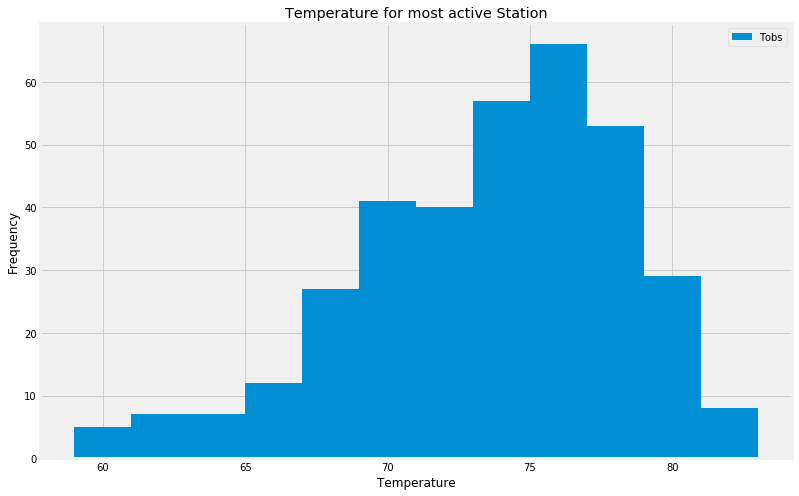

In [58]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature = session.query(Measurement.tobs).filter_by(station = most_active_station).\
    filter(Measurement.date >= one_year_before_date).filter(Measurement.date <= last_date).all()
temp_df = pd.DataFrame(temperature,columns =['Tobs'])
plot1 = temp_df.hist(bins = 12,figsize =(12,8),label = 'Tobs')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.title('Temperature for most active Station')
plt.savefig('../output/temperature_histogram.png')

## Bonus Challenge Assignment

### Temperture Analysis I

In [ ]:
#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, 
#for example, June and December?
#You may either use SQLAlchemy or pandas's `read_csv()` to perform this portion
#Identify the average temperature in June at all stations across all available years in the dataset.
#Do the same for December temperature.
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?

In [59]:
#Identify the temperature in June at all stations across all available years in the dataset.
temp_only_june = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()
temp_only_june

[('USC00519397', '2010-06-01', 78.0),
 ('USC00519397', '2010-06-02', 76.0),
 ('USC00519397', '2010-06-03', 78.0),
 ('USC00519397', '2010-06-04', 76.0),
 ('USC00519397', '2010-06-05', 77.0),
 ('USC00519397', '2010-06-06', 78.0),
 ('USC00519397', '2010-06-07', 77.0),
 ('USC00519397', '2010-06-08', 78.0),
 ('USC00519397', '2010-06-09', 78.0),
 ('USC00519397', '2010-06-10', 79.0),
 ('USC00519397', '2010-06-11', 78.0),
 ('USC00519397', '2010-06-12', 78.0),
 ('USC00519397', '2010-06-13', 78.0),
 ('USC00519397', '2010-06-14', 77.0),
 ('USC00519397', '2010-06-15', 78.0),
 ('USC00519397', '2010-06-16', 78.0),
 ('USC00519397', '2010-06-17', 77.0),
 ('USC00519397', '2010-06-18', 77.0),
 ('USC00519397', '2010-06-19', 82.0),
 ('USC00519397', '2010-06-20', 78.0),
 ('USC00519397', '2010-06-21', 78.0),
 ('USC00519397', '2010-06-22', 78.0),
 ('USC00519397', '2010-06-23', 78.0),
 ('USC00519397', '2010-06-24', 78.0),
 ('USC00519397', '2010-06-25', 77.0),
 ('USC00519397', '2010-06-26', 76.0),
 ('USC005193

In [60]:
#Identify the average temperature in June at all stations across all available years in the dataset.
req_year = 2010
temp_values_june =[]
while req_year <= 2017:
    temp_june= session.query(func.avg(Measurement.tobs)).\
        filter(extract('month', Measurement.date) == 6).\
        filter(extract('year',Measurement.date) == req_year).group_by(Measurement.station).all()
    req_year += 1
    temp_values_june.append(temp_june)  

temp_values_june
temp_june = [item for sublist in temp_values_june for item in sublist]
temp_june


[(75.62068965517241),
 (74.8),
 (73.6896551724138),
 (72.86363636363636),
 (76.75),
 (72.56521739130434),
 (73.63333333333334),
 (77.76666666666667),
 (76.17241379310344),
 (73.43333333333334),
 (73.46666666666667),
 (72.58333333333333),
 (70.73333333333333),
 (75.19047619047619),
 (75.4),
 (74.61538461538461),
 (76.53846153846153),
 (75.0),
 (75.34482758620689),
 (72.2),
 (75.66666666666667),
 (70.96428571428571),
 (74.95),
 (73.2),
 (72.7),
 (76.23333333333333),
 (75.4),
 (74.93333333333334),
 (73.56666666666666),
 (76.25),
 (71.2),
 (76.0),
 (72.76666666666667),
 (77.0),
 (76.24137931034483),
 (73.96428571428571),
 (73.83333333333333),
 (76.53846153846153),
 (71.72413793103448),
 (78.46666666666667),
 (72.73333333333333),
 (78.13333333333334),
 (76.74074074074075),
 (70.15789473684211),
 (74.8076923076923),
 (77.29629629629629),
 (71.62068965517241),
 (78.6923076923077),
 (72.16666666666667),
 (78.3),
 (77.37931034482759),
 (73.86666666666666),
 (77.11111111111111),
 (71.81481481481

In [61]:
#Identify the temperature in December e at all stations across all available years in the dataset.
temp_only_december = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()
temp_only_december

[('USC00519397', '2010-12-01', 76.0),
 ('USC00519397', '2010-12-03', 74.0),
 ('USC00519397', '2010-12-04', 74.0),
 ('USC00519397', '2010-12-06', 64.0),
 ('USC00519397', '2010-12-07', 64.0),
 ('USC00519397', '2010-12-08', 67.0),
 ('USC00519397', '2010-12-09', 77.0),
 ('USC00519397', '2010-12-10', 66.0),
 ('USC00519397', '2010-12-11', 69.0),
 ('USC00519397', '2010-12-12', 68.0),
 ('USC00519397', '2010-12-13', 68.0),
 ('USC00519397', '2010-12-14', 71.0),
 ('USC00519397', '2010-12-15', 74.0),
 ('USC00519397', '2010-12-16', 67.0),
 ('USC00519397', '2010-12-17', 66.0),
 ('USC00519397', '2010-12-18', 69.0),
 ('USC00519397', '2010-12-19', 71.0),
 ('USC00519397', '2010-12-23', 70.0),
 ('USC00519397', '2010-12-24', 70.0),
 ('USC00519397', '2010-12-26', 74.0),
 ('USC00519397', '2010-12-27', 74.0),
 ('USC00519397', '2010-12-28', 71.0),
 ('USC00519397', '2010-12-29', 75.0),
 ('USC00519397', '2010-12-30', 75.0),
 ('USC00519397', '2010-12-31', 72.0),
 ('USC00519397', '2011-12-01', 69.0),
 ('USC005193

In [62]:
#Identify the average temperature in December at all stations across all available years in the dataset.
req_year1 = 2010
temp_values_december =[]
while req_year1 <= 2017:
    temp_december= session.query(func.avg(Measurement.tobs)).\
        filter(extract('month', Measurement.date) == 12).\
        filter(extract('year',Measurement.date) == req_year1).group_by(Measurement.station).all()
    req_year1 += 1
    temp_values_december.append(temp_december)  

temp_values_december
temp_december = [item for sublist in temp_values_december for item in sublist]
temp_december

[(70.0),
 (70.96774193548387),
 (69.23333333333333),
 (69.48387096774194),
 (69.5),
 (72.23076923076923),
 (69.0),
 (70.64),
 (71.61290322580645),
 (70.48387096774194),
 (71.09677419354838),
 (70.65384615384616),
 (69.16666666666667),
 (70.91666666666667),
 (70.12903225806451),
 (71.87096774193549),
 (72.2258064516129),
 (70.56666666666666),
 (70.06451612903226),
 (74.3),
 (68.80645161290323),
 (73.16666666666667),
 (73.5),
 (70.12903225806451),
 (71.1),
 (73.51612903225806),
 (69.33333333333333),
 (71.48387096774194),
 (74.33333333333333),
 (70.06896551724138),
 (70.95),
 (72.5),
 (69.54838709677419),
 (70.93548387096774),
 (72.16129032258064),
 (68.0),
 (70.35483870967742),
 (74.17391304347827),
 (68.22222222222223),
 (74.55),
 (66.70967741935483),
 (69.38709677419355),
 (70.26666666666667),
 (73.06666666666666),
 (76.79166666666667),
 (70.64285714285714),
 (73.38461538461539),
 (73.38709677419355),
 (73.19354838709677),
 (74.03703703703704),
 (70.51612903225806),
 (74.21428571428571

In [63]:
#t-test for the temperatures in june and in december for the all the stations across all the years
stats.ttest_ind(temp_june, temp_december, equal_var=False)

Ttest_indResult(statistic=array([9.72714899]), pvalue=array([7.70364427e-17]))

Unpaired t-test will be done here as we are dealing with 2 different groups of data(temperature for june and temperature for december).The p-value from the above t-test suggests that there is a stastistically significant difference between the means of the temperature of june and temperature of december. 

### Temperture Analysis II

In [64]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [74]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_trip = '2018-01-01'
end_trip = '2018-01-10'
prev_start_trip = dt.datetime.strptime(start_trip,"%Y-%m-%d") - dt.timedelta(days=365)
prev_end_trip = dt.datetime.strptime(end_trip,"%Y-%m-%d") - dt.timedelta(days=365)
ps=prev_start_trip.date()
start_trip=ps.strftime("%Y-%m-%d")
pe=prev_end_trip.date()
end_trip=pe.strftime("%Y-%m-%d")

result =calc_temps(start_trip,end_trip)
tmin = result[0][0]
tave = result[0][1]
tmax = result[0][2]
result

[(60.0, 68.0327868852459, 77.0)]

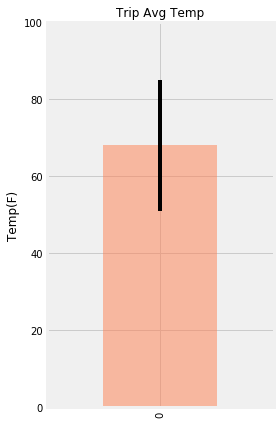

In [75]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
result_df = pd.DataFrame(result,columns = ['tmin','tave','tmax'])
avg_temp = result_df['tave']
error = result_df.iloc[0]['tmax']-result_df.iloc[0]['tmin']
avg_temp.plot(kind = 'bar',yerr =error,figsize =(4,6),color = 'coral',alpha = 0.5)
plt.ylim(0,100)
plt.title("Trip Avg Temp",fontsize = 12)
plt.ylabel("Temp(F)",fontsize = 12)
plt.tight_layout()
plt.savefig('output/Temperature.png')

### Daily Rainfall Average

In [76]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]
rainfall = session.query(*sel).group_by(Measurement.station).\
    filter(Measurement.date >=start_trip).filter(Measurement.date <=end_trip).\
    filter(Measurement.station == Station.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_df = pd.DataFrame(rainfall,columns = ['station','name','latitude','longitude','elevation','prcp'])
rainfall_df

,station,name,latitude,longitude,elevation,prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.63
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.63
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.20
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [77]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [78]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_trip = '2018-01-01'
end_trip = '2018-01-10'

# Use the start and end date to create a range of dates


# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
dateList = []
mnthDayList = []
normals =[]
trip_dates = []
trip_normals = []

a = dt.datetime.strptime(start_trip, "%Y-%m-%d")
numdays = 10

for x in range (0, numdays):
    dateList.append(a + dt.timedelta(days = x))
    
for date in dateList:
    trip_dates.append(date.strftime('%Y-%m-%d'))

for date in dateList:
    mnthDayList.append(date.strftime('%m-%d'))
#print (mnthDayList)

for date in mnthDayList:
    normals.append(daily_normals(date))
    
#print(normals)
normals_list = [item for sublist in normals for item in sublist]
normals_list

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0)]

In [79]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals_list,columns= ['tmin','tave','tmax'])
normals_df['date']= trip_dates
normals_df.set_index('date',inplace = True)
normals_df

,tmin,tave,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0
2018-01-08,57.0,67.160714,75.0
2018-01-09,58.0,67.929825,78.0


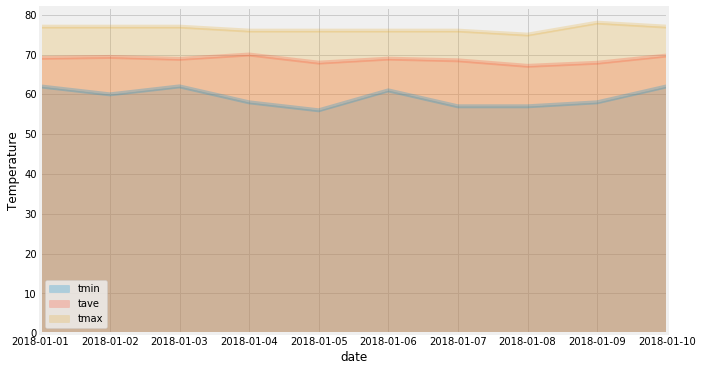

In [80]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked = False,figsize = (10,6),alpha = 0.25)
plt.ylabel("Temperature")
plt.savefig('output/daily_normals.png')